# import

In [2]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os

In [3]:

from dwave.system import DWaveSampler

# Use a D-Wave system as the sampler
f = open("token.txt", "r")
#sampler = DWaveSampler(solver=dict(topology__type='chimera'),token=f.read())
sampler = DWaveSampler(solver=dict(topology__type='zephyr'),token=f.read())

print("QPU {} was selected.".format(sampler.solver.name))

QPU Advantage2_prototype1.1 was selected.


# functions

In [4]:
def Reverse(tup):
    newtup=(tup[1],tup[0])
    return newtup

In [5]:
def RegsToTups(all_regs):
    alledges=[]
    allnodes=[]
    for arr in all_regs:
        list0=arr[0]
        list1=arr[1]
        for i in range(len(list0)):
            qubit0=int(list0[i])
            qubit1=int(list1[i])
            alledges.append((qubit0,qubit1))
            allnodes.append(qubit0)
            allnodes.append(qubit1)
    allnodes=set(allnodes)
    return alledges,allnodes

# Embedding of a single plaquette term

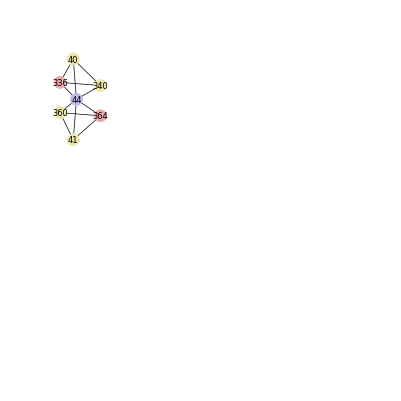

In [15]:
ancillas = {336, 364}
plaquette = {44}
qubits = {40, 340, 360, 41}
alledges_non_filter = [(40, 340), (40, 336), (40, 44), (336, 340), (336, 44), (340, 44), (44, 41), (44, 360), (44, 364), (360, 364), (360, 41), (364, 41)]
alledges = []
for edge in alledges_non_filter:
    if edge in sampler.edgelist:
        alledges.append(edge)
    elif Reverse(edge) in sampler.edgelist:
        alledges.append(Reverse(edge))

qubits=list(set(qubits))
#allnodes = list(set(allnodes))
ancillas=list(set(ancillas))
plaquette=list(set(plaquette))
allnodes = ancillas + qubits + plaquette


plt.ion()
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["figure.dpi"]=50

alllabels={}
for node in allnodes:
    alllabels.update({node:str(node)})

graph_all=dnx.zephyr_graph(4,edge_list=alledges)

allcolors=[]
for node in graph_all.nodes():
    if (node in qubits):
        allcolors.append('#ede6a8')
    elif (node in ancillas):
        allcolors.append('#eda8a8')
    elif (node in plaquette):
        allcolors.append('#c1b4ed')
    else:
        allcolors.append('none')

# allcolors=np.array([sorted(allnodes),allcolors])
    
dnx.draw_zephyr(
    graph_all,
    node_color=allcolors,
    labels=alllabels,
)
# dnx.draw_zephyr(Zeph)
# dnx.draw_zephyr(Kag1,node_color='#eda8a8',with_labels=True)
# dnx.draw_zephyr(Kag2,node_color='b',with_labels=True)
# dnx.draw_zephyr(Kag2andcon,node_color='#83ebe0',with_labels=True)
# plt.savefig('folded_kagome')
plt.show()

In [11]:
graph_all.edges

EdgeView([(40, 336), (40, 44), (41, 44), (41, 360), (41, 364), (44, 336), (44, 360), (44, 364), (360, 364)])

In [12]:
nodecheck = (336, 349)
nodecheck in sampler.edgelist or Reverse(nodecheck) in sampler.edgelist


False

create the h dict and the J dict - By Hand!

In [46]:
h_dict = {}
for i in graph_all.nodes:
    if i in ancillas:
        h_dict.update({i:-2})
    elif i in plaquette:
        h_dict.update({i:-2})
    elif i in qubits:
        h_dict.update({i:-1})

J_dict = {}
for e in graph_all.edges:
    if e[0] in ancillas or e[1] in ancillas:
        J_dict.update({e:2})
    else:
        J_dict.update({e:1})

# inspector

In [48]:


response = sampler.sample_ising(h = h_dict, J=J_dict,
                                            num_reads=100,
                                            annealing_time=20,
                                            answer_mode="raw")
dwave.inspector.show(response)

Serving Inspector on http://127.0.0.1:18000/?problemId=04b2435f-a346-40d3-8c77-5873f052fe1c

'http://127.0.0.1:18000/?problemId=04b2435f-a346-40d3-8c77-5873f052fe1c'

In [49]:
response.record

rec.array([([-1,  1,  1,  1, -1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1, -1,  1, -1, -1,  1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([-1, -1, -1,  1,  1,  1,  1], -8., 1),
           ([ 1, -1,  1, -1,  1, -1,  1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1,  1, -1], -8., 1),
           ([ 1,  1,  1, -1,  1

In [52]:
#the index of the plaquette qubit
ind_plaquette = response.variables.index(44)
inds_qb_plaquettes = []
for j in qubits:
    inds_qb_plaquettes.append(response.variables.index(j))


In [53]:
inds_qb_plaquettes

[0, 1, 4, 5]

In [40]:
response.record

([ 1, -1, -1,  1, -1,  1,  1], -8., 1)

In [55]:
np.prod(response.record[10][0][inds_qb_plaquettes])

1

In [56]:
plaq_values = []
plaq_values_compare = []
for resp in response.record:
    plaq_values.append(resp[0][ind_plaquette])
    plaq_values_compare.append(np.prod(response.record[10][0][inds_qb_plaquettes]))
#plaq_values

In [59]:
#count the number of times constraint if off. 
coff = 0
for i in range(100):
    if plaq_values[i] != plaq_values_compare[i]:
        coff += 1

print(coff/100)

0.06


6 % of iterations lead to the wrong plaquette value

In [51]:
np.mean(plaq_values)

0.88

This can improved by doing some reverse annealing runs to find the ground state.

# Do C=1 (odd constraint:)

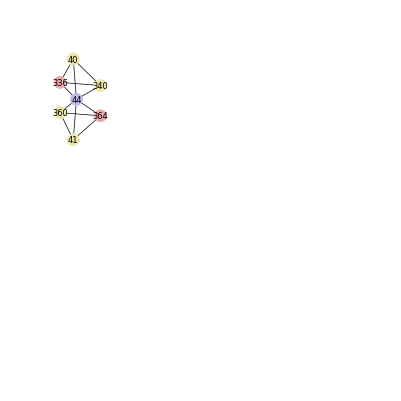

In [60]:
ancillas_top = [336]
ancillas_bottom = [364]
plaquette = [44]
qubits_top = [40, 340]
qubits_bottom = [360, 41]
alledges_non_filter = [(40, 340), (40, 336), (40, 44), (336, 340), (336, 44), (340, 44), (44, 41), (44, 360), (44, 364), (360, 364), (360, 41), (364, 41)]
alledges = []
for edge in alledges_non_filter:
    if edge in sampler.edgelist:
        alledges.append(edge)
    elif Reverse(edge) in sampler.edgelist:
        alledges.append(Reverse(edge))


qubits = qubits_top + qubits_bottom
#allnodes = list(set(allnodes))
ancillas = ancillas_top + ancillas_bottom
allnodes = ancillas + qubits + plaquette


plt.ion()
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["figure.dpi"]=50

alllabels={}
for node in allnodes:
    alllabels.update({node:str(node)})

graph_all=dnx.zephyr_graph(4,edge_list=alledges)

allcolors=[]
for node in graph_all.nodes():
    if (node in qubits):
        allcolors.append('#ede6a8')
    elif (node in ancillas):
        allcolors.append('#eda8a8')
    elif (node in plaquette):
        allcolors.append('#c1b4ed')
    else:
        allcolors.append('none')

# allcolors=np.array([sorted(allnodes),allcolors])
    
dnx.draw_zephyr(
    graph_all,
    node_color=allcolors,
    labels=alllabels,
)
# dnx.draw_zephyr(Zeph)
# dnx.draw_zephyr(Kag1,node_color='#eda8a8',with_labels=True)
# dnx.draw_zephyr(Kag2,node_color='b',with_labels=True)
# dnx.draw_zephyr(Kag2andcon,node_color='#83ebe0',with_labels=True)
# plt.savefig('folded_kagome')
plt.show()

first attempt

In [103]:
cv = -1
#-1 is even encoding, which works
#1 is odd encoding
h_dict = {}
for i in graph_all.nodes:
    if i in ancillas_top:
        h_dict.update({i:2*cv})
    elif i in ancillas_bottom:
        h_dict.update({i:-2})
    elif i in plaquette:
        h_dict.update({i:-(1-cv)})
    elif i in qubits_top:
        h_dict.update({i:cv})
    elif i in qubits_bottom:
        h_dict.update({i:-1})

J_dict = {}
for e in graph_all.edges:
    if e[0] in ancillas_top or e[1] in ancillas_top:
        J_dict.update({e:-2*cv})
    elif e[0] in ancillas_bottom or e[1] in ancillas_bottom:
        J_dict.update({e:2})
    elif e[0] in qubits_top or e[1] in qubits_top:
        J_dict.update({e:-cv})
    elif e[0] in qubits_bottom or e[1] in qubits_bottom:
        J_dict.update({e:1})

second attempt

In [184]:
cv = 1 #just an overall minus or plus sign! no that does not work.
h_dict = {}
for i in graph_all.nodes:
    if i in ancillas_top:
        h_dict.update({i:2})
    elif i in ancillas_bottom:
        h_dict.update({i:-2})
    elif i in plaquette:
        h_dict.update({i:0})
    elif i in qubits_top:
        h_dict.update({i:1})
    elif i in qubits_bottom:
        h_dict.update({i:-1})

J_dict = {}
for e in graph_all.edges:
    if e[0] in ancillas_top or e[1] in ancillas_top:
        J_dict.update({e:-2})
    elif e[0] in ancillas_bottom or e[1] in ancillas_bottom:
        J_dict.update({e:2})
    else:
        if e[0] in qubits_top or e[1] in qubits_top:
            J_dict.update({e:-1})
        elif e[0] in qubits_bottom or e[1] in qubits_bottom:
            J_dict.update({e:1})

In [185]:
num_reads = 100
response = sampler.sample_ising(h = h_dict, J=J_dict,
                                            num_reads=num_reads,
                                            annealing_time=100,
                                            answer_mode="raw", num_spin_reversal_transforms = 5)

In [186]:
dwave.inspector.show(response)

Serving Inspector on http://127.0.0.1:18000/?problemId=1a47de8c-6408-4f99-ada9-b5b82e9c8e42

'http://127.0.0.1:18000/?problemId=1a47de8c-6408-4f99-ada9-b5b82e9c8e42'

In [123]:
#the index of the plaquette qubit
ind_plaquette = response.variables.index(44)
inds_qb_plaquettes = []
for j in qubits:
    inds_qb_plaquettes.append(response.variables.index(j))
    
    
plaq_values = []

plaq_values_compare = []
for resp in response.record:
    plaq_values.append(resp[0][ind_plaquette])
    plaq_values_compare.append(np.prod(response.record[10][0][inds_qb_plaquettes]))

print("Avg value of the p central spin readout ", np.mean(plaq_values))
print("Avg product of all qubits ", np.mean(plaq_values_compare))
#plaq_values
#count the number of times constraint if off. 
coff = 0
for i in range(100):
    if plaq_values[i] != plaq_values_compare[i]:
        coff += 1

print("Number of cases where ancilla read != Prod of sigma z on the plaquette: ", coff/100)

Avg value of the p central spin readout  -0.04
Avg product of all qubits  1.0
Number of cases where ancilla read != Prod of sigma z on the plaquette:  0.52


For C = 1, all 100 reads leads to -1 product, meaning odd plaquettes. 

For C = -1, all 100 reads lead to 1 read of the ancilla. So there is a ploblem there.